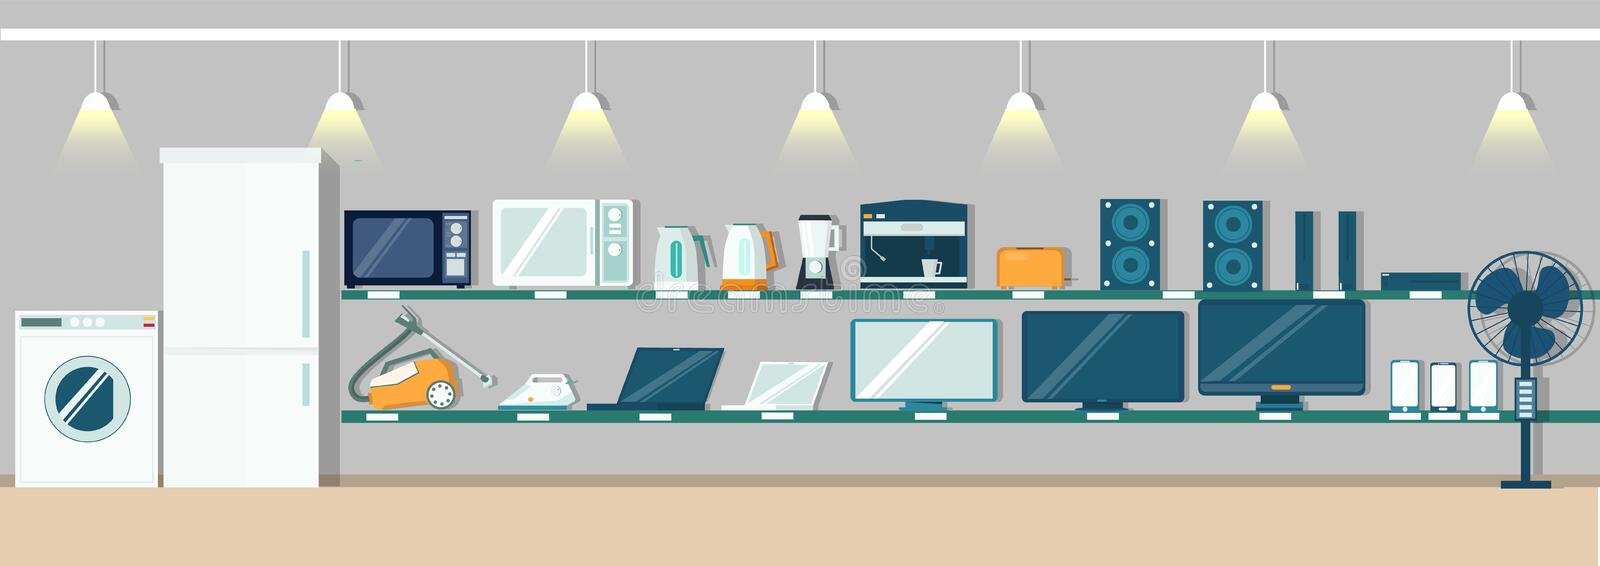

# Analise de Vendas - Eletrônicos

O projeto será uma análise exploratoria dos dados, para nos permitir obter um melhor entendimento do negócio e dos produtos, respondendo a questões:

- Quais meses houve maior venda e a mais baixa?
- Quais o produto mais comprado da empresa, em valores absolutos e com descontos?
- Quais regiões com maior impacto de descontos?
- Quais os produtos estava com mais vezes em desconto em e qual foi o fonecedor que concendeu maior desconto ao longo do ano?


Neste projeto, irei fazer a pela limpeza dos dados assim como a análise e a visualiza~ção dos dados.

# Libs

In [51]:
import pandas as pd
import matplotlib.pyplot as plot
plot.style.use("seaborn")

# Dataset

In [2]:
df = pd.read_excel("Store_Sales.xlsx")

In [3]:
df.head()

,Data da Compra,Produto,PrecoOriginal,PrecoPago,Fornecedor,Qtd. Comprada,TotalOriginal,TotalPago,Nome Comprador,Sobrenome,Região Destino,Unnamed: 11
0,2020-01-01 00:00:00,Lâmpada,595.0,595.0,Contoso,1.0,595.0,595.0,Suzanne,Zhou,Brasil - ES,NaN
1,2020-01-01 00:00:00,Ar Condicionado,595.0,368.9,Contoso,1.0,595.0,368.9,Deanna,Suarez,Brasil - ES,NaN
2,2020-01-01 00:00:00,Lâmpada,25.0,25.0,Southridge Video,1.0,25.0,25.0,Deanna,Gutierrez,Brasil - RJ,NaN
3,2020-01-01 00:00:00,Aparelho de Som,32.0,32.0,Hashtag Toys,4.0,128.0,128.0,Jaclyn,Cai,Brasil - SP,NaN
4,2020-01-01 00:00:00,Ventilador,64.9,64.9,Hashtag Toys,2.0,129.8,129.8,Latoya,Xu,Brasil - SP,NaN


In [4]:
df.shape

(9691, 12)

# Tratar base de dados


In [27]:
df.isna().sum()

Data da Compra        0
Produto               0
PrecoOriginal         0
PrecoPago             0
Fornecedor            0
Qtd. Comprada         0
TotalOriginal         0
TotalPago             0
Nome Comprador        0
Sobrenome             0
Região Destino        0
Desconto Negociado    0
Ano_Compra            0
Mes_Compra            0
dtype: int64

In [6]:
df.dropna(subset=["Produto"], inplace=True)

In [7]:
df.dtypes

Data da Compra     object
Produto            object
PrecoOriginal     float64
PrecoPago         float64
Fornecedor         object
Qtd. Comprada     float64
TotalOriginal     float64
TotalPago         float64
Nome Comprador     object
Sobrenome          object
Região Destino     object
Unnamed: 11        object
dtype: object

In [8]:
df["Data da Compra"] = pd.to_datetime(df["Data da Compra"])


In [9]:
df.drop("Unnamed: 11", axis=1 , inplace=True)

#  Data Analisys

In [10]:
#Sumarização dos valores pagos ( Valores com desconto aplicado) e valores originais ( São valores sem desconto).

print(df["TotalPago"].sum())
print(df["TotalOriginal"].sum())

3619798.6399999997
3874069.882


In [11]:
df["Desconto Negociado"] = df["TotalOriginal"]-df["TotalPago"]

In [12]:
 df["Ano_Compra"], df["Mes_Compra"] = (df["Data da Compra"].dt.year , df["Data da Compra"].dt.month)

In [13]:
df.head(1)

,Data da Compra,Produto,PrecoOriginal,PrecoPago,Fornecedor,Qtd. Comprada,TotalOriginal,TotalPago,Nome Comprador,Sobrenome,Região Destino,Desconto Negociado,Ano_Compra,Mes_Compra
0,2020-01-01,Lâmpada,595.0,595.0,Contoso,1.0,595.0,595.0,Suzanne,Zhou,Brasil - ES,0.0,2020,1


In [14]:
df.dtypes

Data da Compra        datetime64[ns]
Produto                       object
PrecoOriginal                float64
PrecoPago                    float64
Fornecedor                    object
Qtd. Comprada                float64
TotalOriginal                float64
TotalPago                    float64
Nome Comprador                object
Sobrenome                     object
Região Destino                object
Desconto Negociado           float64
Ano_Compra                     int64
Mes_Compra                     int64
dtype: object

In [43]:
df["TotalPago"].describe()

count     9685.000000
mean       373.753086
std        620.109645
min          2.990000
25%         35.520000
50%        126.900000
75%        480.000000
max      11900.000000
Name: TotalPago, dtype: float64

# Data Visualization

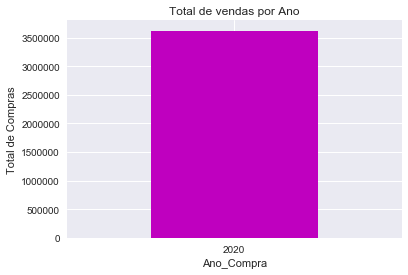

In [38]:

df.groupby("Ano_Compra")["TotalPago"].sum().plot.bar(title="Total de vendas por Ano", color="m")
plot.xlabel("Ano_Compra")
plot.ylabel("Total de Compras");
round(df["TotalPago"].sum(),2)
plot.xticks(rotation ="horizontal");

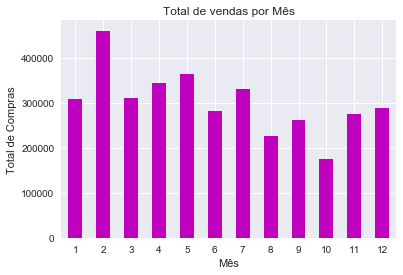

In [39]:

df.groupby("Mes_Compra")["TotalPago"].sum().sort_index().plot.bar(title="Total de vendas por Mês", color="m")
plot.xlabel("Mês")
plot.ylabel("Total de Compras")
plot.xticks(rotation ="horizontal");


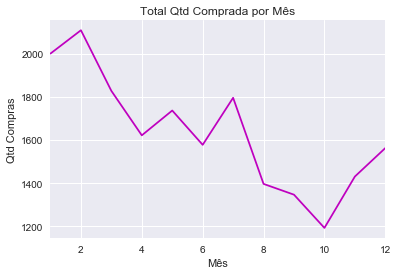

In [37]:
df.groupby("Mes_Compra")["Qtd. Comprada"].sum().sort_index().plot(title="Total Qtd Comprada por Mês", color="m")
plot.xlabel("Mês")
plot.ylabel("Qtd Compras");


- Amostragem dos dados é somente de 2020.
- Meses de maiores vendas são os meses de fevereiro e julho.( * Verificar! - Pode ser periodo de férias?)
- Meses de menores vendas é agosto e outubro.


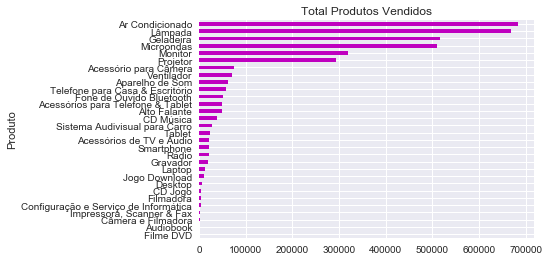

In [36]:
df.groupby("Produto")["TotalPago"].sum().sort_values().plot.barh(title="Total Produtos Vendidos", color="m");

In [71]:
df.groupby(["Produto"])["TotalPago","Desconto Negociado"].sum().sort_values("Desconto Negociado",ascending=False).head(5)

,TotalPago,Desconto Negociado
Produto,,
Ar Condicionado,683487.91,48853.99
Lâmpada,668512.69,44740.31
Geladeira,517334.34,37504.76
Microondas,509254.49,35876.81
Projetor,293384.92,22814.38



- Os top 5 produtos mais vendidos são: AC, Lâmpada, Geladeira, Microondas e Monitor em valores absolutos.
- Os top 5 produtos com maiores desconto são : AC, Lâmpada, Geladeira , Microondas e Projetor.

Região Destino
Brasil - SP    125781.574
Brasil - RJ     65286.688
Brasil - ES     35607.470
Brasil - BA     17416.390
Brasil - MA      8955.280
Brasil - AM      1223.840
Name: Desconto Negociado, dtype: float64


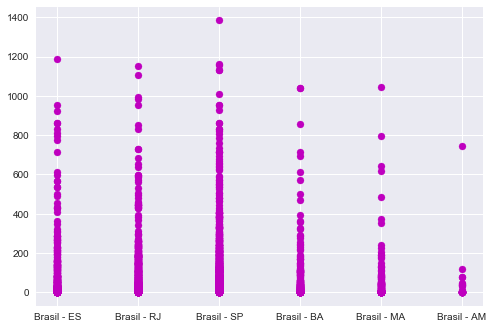

In [81]:
print(df.groupby("Região Destino")["Desconto Negociado"].sum().sort_values(ascending=False))
plot.scatter(x=df["Região Destino"], y =df["Desconto Negociado"],color="m");


- Os maiores valores negociados por região estão com maior concentração em SP e RJ
- Menor valores Negociados é em AM

In [89]:
df.groupby("Produto")["Desconto Negociado"].count().head(5).sort_values(ascending=False)

Produto
Aparelho de Som                      578
Alto Falante                         138
Acessório para Câmera                 77
Acessórios de TV e Áudio              63
Acessórios para Telefone & Tablet     38
Name: Desconto Negociado, dtype: int64

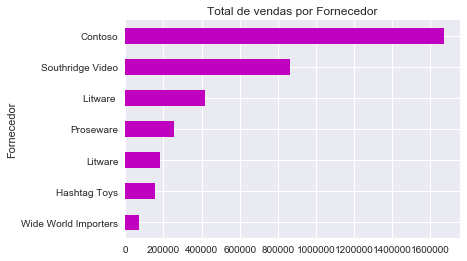

In [17]:
df.groupby("Fornecedor")["TotalPago"].sum().sort_values().plot.barh(title="Total de vendas por Fornecedor", color="m");

- O produto que obteve mais vezes desconto foi o Aparelho de som com 578 vezes (Verificar! Estava com queima de estoque ?) e logo depois alto falante com 138 vezes.
- Contoso foi o fonecedor que mais ofereceu desconto em valores.

In [ ]:
#Fazer dowloand dos arquivos tratados
#df.to_csv("df_vendas_eletronicos_dados_tratados", index=False)